<img src="https://github.com/luishernand/pandas_fundamentals/blob/master/logo4.JPG?raw=true" height = 200 width=200 alt=" ">  

# Kidney Diasease  

**Descripción:** Red neuronal simple que identifica o para clasificar las personas si tienen problemas o no de riñones

|Email|Fecha|
|-----|-----|
|luishernandezmatos@yahoo.com|24 de junio 2020|

## Contenido  

1. [Librerias soporte](#Modulos-y-librerias-de-soporte)
1. [Carga de los datos](#Carga-del-Dataset:)
1. [Selección de columnas](#Seleccionar-columnas-a-utilizar)
1. [Tratamiento de datos NaN](#Ver-datos-NaN)
1. [Preparar los datos para el modelo](#Preparar-los-datos)
1. [Variables: Dependiente e Independiente](#Dividir-en-Variables-dependiente-e-independiente)
1. [Normalizar la Variable X](#Normalizar-los-datos-entre-0-y-1)
1. [Dividir los datos en entrenamiento y test](#Dividir-en-datos-de-entrenamiento-y-testeo)
1. [Crear la red Neuronal](#Modelo-de-Red-neuronal-Simple)

### Modulos y librerias de soporte

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import keras

Using TensorFlow backend.


### Carga del Dataset:  
[kidney_Disease.csv](https://www.kaggle.com/csyhuang/predicting-chronic-kidney-disease?select=kidney_disease.csv)

In [6]:
df = pd.read_csv('kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [7]:
df.shape

(400, 26)

### Seleccionar columnas a utilizar

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
id                400 non-null int64
age               391 non-null float64
bp                388 non-null float64
sg                353 non-null float64
al                354 non-null float64
su                351 non-null float64
rbc               248 non-null object
pc                335 non-null object
pcc               396 non-null object
ba                396 non-null object
bgr               356 non-null float64
bu                381 non-null float64
sc                383 non-null float64
sod               313 non-null float64
pot               312 non-null float64
hemo              348 non-null float64
pcv               330 non-null object
wc                295 non-null object
rc                270 non-null object
htn               398 non-null object
dm                398 non-null object
cad               398 non-null object
appet             399 non-null object
pe         

In [8]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [22]:
columns_utilizar = ['age','sg', 'al', 'sc', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'classification']

datos = df[columns_utilizar]
datos.head()

,age,sg,al,sc,hemo,pcv,wc,rc,htn,classification
0,48.0,1.020,1.0,1.2,15.4,44,7800,5.2,yes,ckd
1,7.0,1.020,4.0,0.8,11.3,38,6000,NaN,no,ckd
2,62.0,1.010,2.0,1.8,9.6,31,7500,NaN,no,ckd
3,48.0,1.005,4.0,3.8,11.2,32,6700,3.9,yes,ckd
4,51.0,1.010,2.0,1.4,11.6,35,7300,4.6,no,ckd


### Ver datos NaN

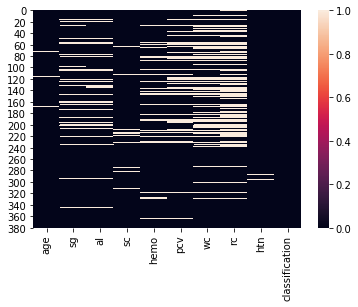

In [23]:
sns.heatmap(datos.isnull())

In [24]:
datos = datos.dropna()

In [25]:
datos.isnull().sum()

age               0
sg                0
al                0
sc                0
hemo              0
pcv               0
wc                0
rc                0
htn               0
classification    0
dtype: int64

In [26]:
datos.shape

(236, 10)

### Preparar los datos

In [30]:
print('htn',datos.htn.unique())
print('class:',datos.classification.unique())

htn ['yes' 'no']
class: ['ckd' 'notckd']


In [31]:
datos['htn'] = datos.htn.map({'yes': 1, 'no': 0})
datos['classification'] = datos.classification.map({'ckd': 1, 'notckd': 0})
datos.head()

,age,sg,al,sc,hemo,pcv,wc,rc,htn,classification
0,48.0,1.020,1.0,1.2,15.4,44,7800,5.2,1,1
3,48.0,1.005,4.0,3.8,11.2,32,6700,3.9,1,1
4,51.0,1.010,2.0,1.4,11.6,35,7300,4.6,0,1
5,60.0,1.015,3.0,1.1,12.2,39,7800,4.4,1,1
7,24.0,1.015,2.0,1.1,12.4,44,6900,5,0,1


### Dividir en Variables dependiente e independiente

In [32]:
X = datos.drop('classification', axis = 1)
y = datos.classification
X.shape, y.shape

((236, 9), (236,))

### Normalizar los datos entre 0 y 1

In [33]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_sc = sc.fit_transform(X)
X_sc.shape

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


(236, 9)

### Dividir en datos de entrenamiento y testeo

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size= 0.2, shuffle = True)

### Modelo de Red neuronal Simple

In [35]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [63]:
model = Sequential()
model.add(Dense(256, input_dim = len(X.columns),activation= 'relu'))
model.add(Dense(1, activation='hard_sigmoid'))

In [64]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 256)               2560      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 257       
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________


In [65]:
model.compile(loss= 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [66]:
#entrenamiento del modelo
history = model.fit(X_train, y_train, batch_size= 40, epochs=15)

Epoch 1/15
188/188 [==============================] - 3s 14ms/step - loss: 0.6787 - accuracy: 0.6649
Epoch 2/15
188/188 [==============================] - 0s 271us/step - loss: 0.6391 - accuracy: 0.8298
Epoch 3/15
188/188 [==============================] - 0s 309us/step - loss: 0.5985 - accuracy: 0.8936
Epoch 4/15
188/188 [==============================] - 0s 271us/step - loss: 0.5593 - accuracy: 0.9149
Epoch 5/15
188/188 [==============================] - 0s 229us/step - loss: 0.5206 - accuracy: 0.9255
Epoch 6/15
188/188 [==============================] - 0s 207us/step - loss: 0.4805 - accuracy: 0.9309
Epoch 7/15
188/188 [==============================] - 0s 213us/step - loss: 0.4402 - accuracy: 0.9362
Epoch 8/15
188/188 [==============================] - 0s 383us/step - loss: 0.4005 - accuracy: 0.9362
Epoch 9/15
188/188 [==============================] - 0s 521us/step - loss: 0.3604 - accuracy: 0.9362
Epoch 10/15
188/188 [==============================] - 0s 207us/step - loss: 0.3184

In [67]:
model.save('ckd.model')

In [68]:
#evaluar el modelo
model.evaluate(X_test, y_test)

48/48 [==============================] - 0s 5ms/step


[0.2496752937634786, 0.8333333134651184]

In [102]:
#predecir modelo
y_pred = model.predict(X_test)

In [103]:
pred = model.predict_classes(X_test)

In [122]:
result = pd.DataFrame({'Original': y_test, 'Predicted':pred[:,0]})
result['diferencia'] = result['Original'] - result['Predicted']
result.head(11)

,Original,Predicted,diferencia
56,1,1,0
172,1,0,1
329,0,0,0
313,0,0,0
378,0,0,0
20,1,1,0
159,1,0,1
272,0,0,0
234,1,1,0
345,0,0,0


In [127]:
#Filtrar los resultados erroneos
result.query('diferencia==1')

,Original,Predicted,diferencia
172,1,0,1
159,1,0,1
108,1,0,1
214,1,0,1
241,1,0,1
94,1,0,1
46,1,0,1
115,1,0,1


In [146]:
df.loc[[172, 159, 108, 214,241,94,46,115] , ]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
172,172,62.0,80.0,1.010,1.0,2.0,NaN,NaN,notpresent,notpresent,...,34,12800,4.9,no,no,no,good,no,no,ckd
159,159,59.0,80.0,1.010,1.0,0.0,abnormal,normal,notpresent,notpresent,...,35,10900,4.3,no,yes,no,poor,no,no,ckd
108,108,45.0,80.0,1.015,0.0,0.0,NaN,abnormal,notpresent,notpresent,...,37,10200,4.2,no,no,no,good,no,no,ckd
214,214,68.0,80.0,1.015,0.0,0.0,NaN,abnormal,notpresent,notpresent,...,\t43,4900,5.2,no,yes,no,good,no,no,ckd
241,241,57.0,70.0,1.015,1.0,0.0,NaN,abnormal,notpresent,notpresent,...,31,4200,3.9,no,no,no,good,no,no,ckd
94,94,65.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,11900,3.9,no,yes,no,good,no,no,ckd
46,46,48.0,70.0,1.015,0.0,0.0,NaN,normal,notpresent,notpresent,...,37,6400,4.7,no,yes,no,good,no,no,ckd
115,115,47.0,80.0,1.010,0.0,0.0,NaN,abnormal,notpresent,notpresent,...,44,5600,4.3,no,no,no,good,no,yes,ckd
